# Modern Data Science 
**(Module 04: Machine Learning)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2018 [TULIP Lab](http://www.tulip.org.au), Australia

---


# Session A - SciPy and Scikit-Learn

**The purpose of this session is to illustrate**

1. How to test installed Numpy and Scikit-Learn packages
2. How to use scikit-lean to load datasets and examine their properties, getting ready for ML tasks.

** References and additional reading and resources**
- [Installing scikit-learn](http://scikit-learn.org/stable/install.html)
- [Lectures on scientific computing with Python](https://github.com/jrjohansson/scientific-python-lectures)


##  Scipy: Scientific Computing Tools for Python

<!--span style="color:#0b486b">3. Scipy: Scientific Computing Tools for Python</span-->

[SciPy](https://www.scipy.org) (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering. In particular, the SciPy ecosystem these are some of the core packages:

- Numpy: a base N-dimensional array package
- Matplotlib: a package that allows you to create charts and plots from data.
- Pandas: tools and data structures to organize and analyze your data.
- SciPy library: a fundamental library for scientific computing such as optimization.

All of these packages are pre-installed when you install the Anaconda. You can check the availibility and versions of above packages as follows:

In [1]:
# scipy
import scipy
print('The scipy version is {}'.format(scipy.__version__))

# numpy
import numpy
print("The numpy version is {}.".format(numpy.__version__))

# matplotlib
import matplotlib
print('The matplotlib version is {}'.format(matplotlib.__version__))

# pandas
import pandas
print('The pandas version is {}'.format(pandas.__version__))

The scipy version is 1.0.0
The numpy version is 1.13.3.
The matplotlib version is 2.1.0
The pandas version is 0.21.0


We now briefly go through these packages to know NumPy, Matplotlib and Pandas to read and write machine learning Python
scripts.

## Numpy<!--3.1 Numpy-->

[Numpy](http://www.numpy.org/) is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. Numpy is a pre-built package included in Anaconda 3. You only need to import to use the package.


###  Arrays<!--3.1.1 Arrays-->
A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the <em>rank</em> of the array; the <em>shape</em> of an array is a tuple of integers giving the size of the array along each dimension.
You can initialize numpy arrays from nested Python lists or use pre-defined functions to create arrays

In [2]:
import numpy as np


a = np.array([1, 2, 3])   # Create a rank 1 array
b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array

print("Arrays are created from nested Python lists\n")

print("The data type of a is {}".format(type(a)))          
print("The shape of a is {}.".format(a.shape))    

print("The shape of a is {}.".format(b.shape))               

print("\nArrays are created with pre-defined functions\n")

c = np.zeros((3,2))   # Create an array of all zeros
print("An all-zero array\n")
print(c)           

d = np.ones((3,2))    # Create an array of all ones
print("\nAn all ones array\n")
print(d)

e = np.full((2,2), 7)  # Create a constant array
print("\nA constant \n")
print(e)

f = np.eye(2)         # Create a 2x2 identity matrix
print("\nA 2x2 identity  array\n")
print(f)      

Arrays are created from nested Python lists

The data type of a is <class 'numpy.ndarray'>
The shape of a is (3,).
The shape of a is (2, 3).

Arrays are created with pre-defined functions

An all-zero array

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]

An all ones array

[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]

A constant 

[[7 7]
 [7 7]]

A 2x2 identity  array

[[ 1.  0.]
 [ 0.  1.]]


###  Array indexing<!--3.1.2  Array indexing-->
Numpy offers several ways to index into arrays.

<strong>Slicing:</strong>Numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [3]:
import numpy as np

a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Slice the subarray consisting of the first 2 rows and columns 1 and 2; 
b = a[:2, 1:3]

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.

print(a[0, 1])   
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   

2
77


You can also mix integer indexing with slice indexing to  yield an array of lower rank than the original array.

In [4]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
print(row_r1, row_r1.shape) 

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
print(col_r1, col_r1.shape)  


[5 6 7 8] (4,)
[77  6 10] (3,)


<strong>Integer array indexing:</strong> When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [5]:
print(a) 


# The returned array will have shape (3,) by choosing elements 
# at [0,1],[1,1], and [2,0]
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]])) 

[[ 1 77  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[1 6 9]
[1 6 9]
[77 77]
[77 77]


<strong>Boolean array indexing:</strong> Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [6]:
# Find the elements of a that are bigger than 2;this returns a 
# numpy array of Booleans of the same shape as a, where each 
# slot of bool_idx tells whether that element of a is > 5.

bool_idx = (a > 5)  
print(bool_idx)     

# We use boolean array indexing to construct a rank 1 array consisting 
# of the elements of a corresponding to the True values of bool_idx
print(a[bool_idx])  

# We can do all of the above in a single concise statement:
print(a[a > 5])

[[False  True False False]
 [False  True  True  True]
 [ True  True  True  True]]
[77  6  7  8  9 10 11 12]
[77  6  7  8  9 10 11 12]


You can refer to [indexing documentation](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html) for further details about numpy array indexing.

### Array math operations <!--3.1.3  Array math operations-->

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:



In [7]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

print("Elementwise sum; both produce the array")
print(x + y)
print(np.add(x, y))

print("Elementwise difference; both produce the array")
print(x - y)
print(np.subtract(x, y))

print("Elementwise product; both produce the array")
print(x * y)
print(np.multiply(x, y))

print("Elementwise division; both produce the array")
print(x / y)
print(np.divide(x, y))

print("Elementwise square root; produces the array")
print(np.sqrt(x))

Elementwise sum; both produce the array
[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]
Elementwise difference; both produce the array
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
Elementwise product; both produce the array
[[  5.  12.]
 [ 21.  32.]]
[[  5.  12.]
 [ 21.  32.]]
Elementwise division; both produce the array
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
Elementwise square root; produces the array
[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]


To execute matrix multiplication,  We instead use the <kbd>dot</kbd> function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. <kbd>dot</kbd> is available both as a function in the numpy module and as an instance method of array objects: 

In [8]:
v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))

# print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
print(x.dot(y))
#print(np.dot(x, y))

219
219
[ 29.  67.]
[[ 19.  22.]
 [ 43.  50.]]


Numpy provides many useful functions for performing computations on arrays; Some useful function are <kbd>sum</kbd>, transpose <kbd>T</kbd>. The full list of mathematical functions provided by numpy in [the documentation](https://docs.scipy.org/doc/numpy/reference/routines.math.html). More functions for manipulating arrays can be found in [the documentation](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html).

In [9]:
x = np.array([[1,2],[3,4]])
print(np.sum(x))  # Compute sum of all elements
print(np.sum(x, axis=0))  # Compute sum of each column
print(np.sum(x, axis=1))  # Compute sum of each row

print(x.T)  

10
[4 6]
[3 7]
[[1 3]
 [2 4]]


### Broadcasting <!--3.1.4 Broadcasting-->
Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.
For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:



In [10]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])

y=x+v
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

More explanation for broadcasting arrays can be found in [the documentation](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

### Numpy Excercises

**<span style="color:red"> Exercise 1: </span>** : *<span style="color:#0b486b"> Create a vector with values ranging from 10 to 20 (inclusive) then reverse that vector (the first element becomes the last)  </span>*.


In [ ]:
# enter your own codes here


<div align="right">
<a href="#matmul1" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="matmul1" class="collapse">
```
import numpy as np
x = np.arange(10,50) 
print(x)  
x = np.arange(50) 
x = x[::-1] 
print(x)
```
</div>

**<span style="color:red"> Exercise 2: </span>** : *<span style="color:#0b486b"> Create random vector of size 10, print the maximum value and its index, and replace that value by 0  </span>*.
Hint: Using *max* and *argmax* functions

In [ ]:
# enter your own codes here


<div align="right">
<a href="#matE2" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="matE2" class="collapse">
```
x = np.random.random(10) 
print(x.max()) 
print(x.argmax()) 
x[x.argmax()] = 0 
print(x) 
```
</div>

**<span style="color:red"> Exercise 3: </span>** : *<span style="color:#0b486b"> Given two vectors: ages and heights as follows:   </span>*

In [ ]:
ages = np.random.randint(low=20, high=60, size=10)
heights = np.random.randint(low=150, high=200, size=10)
print(ages)
print(heights)

*<span style="color:#0b486b"> Order(ascendingly) the people according to their age and print their corresponding heights. </span>* Hints: using *argsort* function.

In [ ]:
# enter your own codes here


<div align="right">
<a href="#mat3" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="mat3" class="collapse">
```ages = np.random.randint(low=20, high=60, size=10)
heights = np.random.randint(low=150, high=200, size=10)
print(ages)
print(heights)
```
</div>

## Matplotlib <!--3.2 Matplotlib-->

Matplotlib can be used for creating plots and charts. The library is generally used as follows:
- Call a plotting function with some data (e.g. .plot()).
- Call many functions to setup the properties of the plot (e.g. labels and colors).
- Make the plot visible (e.g. .show()).

You can create a simple line plot from one dimensional data as follows:

In [11]:
# basic line plot
import matplotlib.pyplot as plt
import numpy
myarray = numpy.array([1, 2, 3])
plt.plot(myarray)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

You also can creat a scatter plot from two dimensional data.

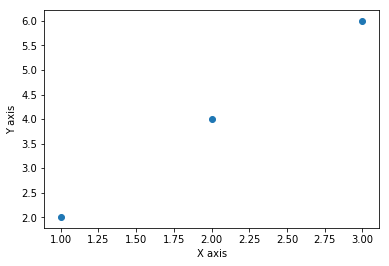

In [12]:
# basic scatter plot
import matplotlib.pyplot as plt
import numpy
x = numpy.array([1, 2, 3])
y = numpy.array([2, 4, 6])
plt.scatter(x,y)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

There are many more plot types and many more properties that can be set on a plot. See [matplotlib for beginner](http://matplotlib.org/users/beginner.html) and [examples](https://matplotlib.org/examples/index.html) to learn more about the Matplotlib API.

### Matplotlib Excercises

**<span style="color:red"> Exercise 1: </span>** : *<span style="color:#0b486b"> Create a plot of  [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) on the interval  [−6,6]  using 256 points. Remember to label the axes! In the following code, we give you the code for sigmoid function.
</span>*. Hint: using the *linspace* function in numpy to create array values for x axis.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# def sigmoid(x,a,b):
# # sigmoid function with parameters a = center; b = width
#     return 1/(1+np.exp(-(x-a)/b))

def sigmoid(x):
    return 1/(1+np.exp(-x))


In [ ]:
# Enter you code here           


<div align="right">
<a href="#mat4" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="mat4" class="collapse">
```
x = np.linspace(-6,6,256) 
y = sigmoid(x)  
plt.plot(x,y) 
plt.xlabel('X') 
plt.ylabel('Y') 
plt.show() 
```
</div>

## Pandas <!--3.3 Pandas-->

Pandas provides data structures and functionality to quickly manipulate and analyze data. The
key to understanding Pandas for machine learning is understanding the **Series** and **DataFrame**
data structures.

### Series <!--3.3.1 Series-->
A series is a one dimensional array of data where the rows are labeled using a time axis. You can access the data in a series like a NumPy array or like a dictionary.


In [13]:
# series
import numpy
import pandas
myarray = numpy.array([1, 2, 3])
rownames = ['a', 'b', 'c']
myseries = pandas.Series(myarray, index=rownames)
print(myseries)

print(myseries[0])
print(myseries['a'])

a    1
b    2
c    3
dtype: int64
1
1


### DataFrame <!--3.3.2 DataFrame-->
A data frame is a multi-dimensional array where the rows and the columns can be labeled.A data frame can be indexed using column names.

In [14]:
# dataframe
import numpy
import pandas
myarray = numpy.array([[1, 2, 3], [4, 5, 6]])
rownames = ['a', 'b']
colnames = ['one', 'two', 'three']
mydataframe = pandas.DataFrame(myarray, index=rownames, columns=colnames)
print(mydataframe)

print("method 1:")
print("one column:\n%s" % mydataframe['one'])

print("method 2:")
print("one column:\n%s" % mydataframe.one)

   one  two  three
a    1    2      3
b    4    5      6
method 1:
one column:
a    1
b    4
Name: one, dtype: int64
method 2:
one column:
a    1
b    4
Name: one, dtype: int64


Examples for manipulation with data using can be found at [Pandas cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html) which provides many short and nice examples.

## Scipy <!--3.4 Scipy-->

Optimization (finding minima or maxima of a function) is a package which is usual used in machine learning. Here we will only look at a few very simple cases.

To use the optimization module in scipy first include the optimize module:

In [15]:
from scipy import optimize


Let's first look at how to find the minima of a simple function of a single variable:

In [16]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

which can be plotted as 

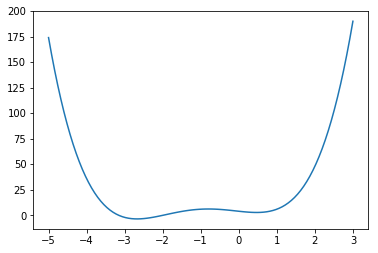

In [17]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax  = plt.subplots()
x = np.linspace(-5, 3, 100)
ax.plot(x, f(x))
plt.show()


We can use the *fmin_bfgs* function to find the minima of a function:



In [18]:
x_min = optimize.fmin_bfgs(f, -2)
print(x_min )

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8
[-2.67298151]


For a more detailed introduction to optimization with SciPy see: [Scipy Optimization](http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html)

---
# Install and Get Started with Scikit-Learn<!--span style="color:#0b486b">4. Install and Get Started with Scikit-Learn</span-->

In [19]:
import sklearn

print("The scikit-learn version is {}.".format(sklearn.__version__))


The scikit-learn version is 0.19.1.


## A brief introduction Scikit-Learn<!--4.3 A brief introduction Scikit-Learn-->


[Scikit-Learn](http://github.com/scikit-learn/scikit-learn) is a Python package designed to give access to **well-known** machine learning algorithms within Python code, through a **clean, well-thought-out API**. It has been built by hundreds of contributors from around the world, and is used across industry and academia.

Scikit-Learn is built upon Python's [NumPy (Numerical Python)](http://numpy.org) and [SciPy (Scientific Python)](http://scipy.org) libraries, which enable efficient in-core numerical and scientific computation within Python. As such, scikit-learn is not specifically designed for extremely large datasets, though there is [some work](https://github.com/ogrisel/parallel_ml_tutorial) in this area.

###  Dataset in Scikit-learn <!--span style="color:#0b486b">Dataset in Scikit-learn</span-->

Machine learning is about creating models from data: for that reason, we'll start by
discussing how data can be represented in order to be understood by the computer.  Along
with this, we'll build on our matplotlib examples from the previous section and show some
examples of how to visualize data.

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

Scikit-Learn package include several datasets that you can load and start playing with them. You can consult with the documentation for details of the provided datasets. 

---
**For example, let's look at the [iris dataset.](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) whose description and historical context can further be found [here](https://en.wikipedia.org/wiki/Iris_flower_data_set)**

*<span style="color:#0b486b">First, we use the command `from sklearn import datasets` to import existing datasets which have been prepared in advance from scikit-learn package as well its loading utilities. </span>*

In [20]:
from sklearn import datasets

*<span style="color:#0b486b"> The following commands then load the iris dataset, examine its structure, description, data and so forth. You are highly encouraged to spend time to get familiar with the syntax and properties of the data, such as examining the values of 'target_names', 'data', etc. </span>*

In [21]:
# load iris dataset
iris = datasets.load_iris()

# examine its keys
iris.keys()

dict_keys(['target', 'feature_names', 'DESCR', 'data', 'target_names'])

In [22]:
# print out its description
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [23]:
X = iris['data']
X.shape

(150, 4)

### Excercises

**<span style="color:red"> Exercise 1: </span>** : *<span style="color:#0b486b"> The the following sandbox cell, or create your own, to explore and build your understanding  </span>*.

In [ ]:
# sand box cell -- enter your various commands here to explore and build your understanding,
# e.g., try "print(iris.target_names)"


<div align="right">
<a href="#mat5" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="mat5" class="collapse">
```
# sand box cell -- enter your various commands here to explore and build your understanding,
# e.g., try "print(iris.target_names)"
print(iris.target_names)

print(iris.feature_names)

print(iris.target)

print(iris.data[:5,:])
```
</div>

**<span style="color:red"> Exercise 2: </span>** : *<span style="color:#0b486b"> The documentation from scikit-learn [here](http://scikit-learn.org/stable/datasets/index.html) describes several other avaiable datasets. Write your own codes to load and examine the digits recognition dataset with the load_digits() command  </span>*.

In [ ]:
# enter your own codes here


<div align="right">
<a href="#mat6" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="mat6" class="collapse">
```
# enter your own codes here
# load digits dataset
from sklearn import datasets
digits = datasets.load_digits()

# examine its keys
print(digits.keys())

print(digits['DESCR'])

X = digits['data']
print(X.shape)
```
</div>

## Further reading <!--4.4 Further reading-->
* More tutorials, videos on machine learning with scikit-learn can be found at [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos).

* Tutorials and instructions related to Python can be found at [Python basics](
http://prada-research.net/~viet/sit744/w00/00-python_basics.html). The notebook can be downloaded from [here](http://prada-research.net/~viet/sit744/w00/week_00.zip) for you to exercise

* Short and concise introduction to Python 3 is introduced in the [cheatsheet](http://prada-research.net/~viet/sit744/w00/python3-cheatsheet.pdf)
